# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify.

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pyportfolio/pyportfolioopt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/PyPortfolio/PyPortfolioOpt/blob/main/cookbook/5-Hierarchical-Risk-Parity.ipynb)

[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/pyportfolio/pyportfolioopt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/pyportfolio/pyportfolioopt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)


## Downloading data

HRP only requires historical returns

In [3]:
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/pyportfolio/pyportfolioopt.git')
    os.chdir('PyPortfolioOpt/cookbook')

zsh:1: command not found: pip


In [4]:
import pandas as pd
import pypfopt

pypfopt.__version__

'1.5.6'

In [5]:
ticker = ["BLK", "BAC", "AAPL", "TM", "WMT",
          "JD", "INTU", "MA", "UL", "CVS",
          "DIS", "AMD", "NVDA", "PBI", "TGT"]

prices = pd.read_csv("data/prices.csv", parse_dates=True, index_col="Date")[ticker]
prices.tail()

,AAPL,ACN,AMD,AMZN,BABA,BAC,BBY,BLK,COST,CVS,...,T,TGT,TM,TSLA,UAA,UL,UNH,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-10,269.429993,244.550003,243.979996,248.399994,165.889999,53.419998,78.150002,1082.630005,915.559998,77.540001,...,24.83,89.600586,203.940002,445.230011,4.48,60.810001,321.579987,39.849998,102.419998,117.194946
2025-11-11,275.250000,242.559998,237.520004,249.100006,160.800003,53.630001,77.680000,1085.760010,913.859985,79.870003,...,25.18,90.440002,205.990005,439.619995,4.63,61.070000,327.450012,40.700001,103.440002,118.741417
2025-11-12,273.470001,246.529999,258.890015,244.199997,157.910004,54.110001,77.709999,1093.930054,914.000000,80.260002,...,25.65,91.910004,207.289993,430.600006,4.81,60.990002,339.059998,40.799999,103.440002,117.095818
2025-11-13,272.950012,247.570007,247.960007,237.580002,159.839996,52.869999,76.180000,1069.650024,925.080017,79.239998,...,25.75,90.620003,203.259995,401.989990,4.66,60.330002,332.519989,41.110001,102.540001,117.760002
2025-11-14,272.410004,245.210007,246.809998,234.690002,153.800003,52.610001,75.720001,1057.939941,922.979980,77.809998,...,25.59,89.900002,204.080002,404.350006,4.53,59.240002,321.859985,41.060001,102.480003,119.290001


In [6]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,ACN,AMD,AMZN,BABA,BAC,BBY,BLK,COST,CVS,...,T,TGT,TM,TSLA,UAA,UL,UNH,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-10,0.004549,-0.004923,0.044703,0.016325,-0.002705,0.004135,-0.011135,0.000397,-0.007781,-0.018357,...,0.000000,-0.005590,0.009704,0.036576,-0.038627,-0.010737,-0.008112,-0.004497,-0.001657,0.008531
2025-11-11,0.021601,-0.008137,-0.026478,0.002818,-0.030683,0.003931,-0.006014,0.002891,-0.001857,0.030049,...,0.014096,0.009368,0.010052,-0.012600,0.033482,0.004276,0.018254,0.021330,0.009959,0.013196
2025-11-12,-0.006467,0.016367,0.089971,-0.019671,-0.017973,0.008950,0.000386,0.007525,0.000153,0.004883,...,0.018666,0.016254,0.006311,-0.020518,0.038877,-0.001310,0.035456,0.002457,0.000000,-0.013859
2025-11-13,-0.001901,0.004219,-0.042219,-0.027109,0.012222,-0.022916,-0.019689,-0.022195,0.012123,-0.012709,...,0.003899,-0.014035,-0.019441,-0.066442,-0.031185,-0.010821,-0.019289,0.007598,-0.008701,0.005672
2025-11-14,-0.001978,-0.009533,-0.004638,-0.012164,-0.037788,-0.004918,-0.006038,-0.010948,-0.002270,-0.018046,...,-0.006214,-0.007945,0.004034,0.005871,-0.027897,-0.018067,-0.032058,-0.001216,-0.000585,0.012993


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [7]:
from pypfopt import HRPOpt

In [8]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.00562),
             ('ACN', 0.00828),
             ('AMD', 0.00306),
             ('AMZN', 0.00327),
             ('BABA', 0.00823),
             ('BAC', 0.00328),
             ('BBY', 0.005),
             ('BLK', 0.00616),
             ('COST', 0.00876),
             ('CVS', 0.01626),
             ('DIS', 0.00816),
             ('DPZ', 0.01029),
             ('F', 0.00606),
             ('FB', 0.54313),
             ('GE', 0.01662),
             ('GILD', 0.00835),
             ('GM', 0.00884),
             ('GOOG', 0.01028),
             ('IBM', 0.01573),
             ('INTU', 0.00636),
             ('JD', 0.00639),
             ('JPM', 0.00401),
             ('KO', 0.0236),
             ('LUV', 0.00692),
             ('MA', 0.0141),
             ('MCD', 0.02141),
             ('META', 0.00692),
             ('MSFT', 0.00709),
             ('NAT', 0.00791),
             ('NFLX', 0.00489),
             ('NVDA', 0.00362),
             ('PBI', 0.00722),
         

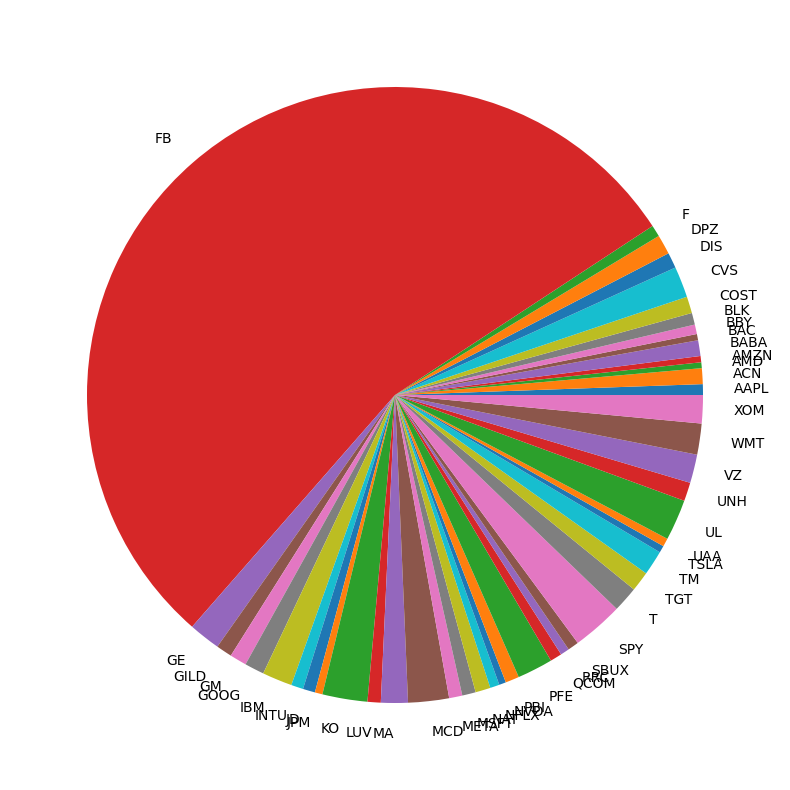

In [9]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [10]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 14.9%
Annual volatility: 9.1%
Sharpe Ratio: 1.63


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

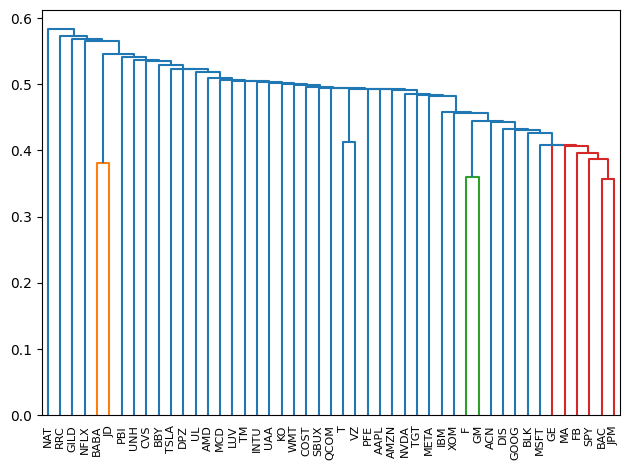

In [11]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.